## Group Report

## Introduction

For our data analysis, we will look at the two predictors of resting blood pressure and maximum heart rate. High resting blood pressure has been shown to cause heart disease in several ways, such as left ventricular hypertrophy, which can reduce the function of the heart. 120/80 is the optimal blood pressure of humans. Maximum heart rate achieved during exercise has been demonstrated to be inversely linked to the chances of one developing heart disease as it represents the fitness of one's heart and the ability to handle exercise. Therefore, our question is, how does resting blood pressure and maximum heart rate influence the diagnosis of heart disease, and are they major contributors? 
    
We’re using preprocessed data from the Cleveland database on heart disease,  originally containing 76 attributes, but we chose from a subset of 14. The 14 attributes include ‘age’, ‘sex’, ‘cp’ or chest pain, ‘trestbps’ or resting blood pressure on admission to the hospital, ‘chol’ or serum cholesterol, ‘fbs’ or fasting blood sugar 120 mg/dl, ‘restecg’ or resting electrocardiographic results, ‘thalac’ or maximum heart rate achieved, ‘exang’ or exercise induced angina, ’oldpeak’ or ST depression induced by exercise relative to rest, ‘slope’ the slope of the peak exercise ST segment, ‘ca’ or number of major vessels (0-3) colored by fluorosopy, ‘thal’: 3 = normal; 6 = fixed defect; 7 = reversible defect, and ‘num’ or diagnosis of heart disease. 


## Methods and Results

### Preprocessing and exploratory data analysis

Here we start by loading our libraries in!

#### Loading libraries

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
set.seed(999)
options(repr.plot.width = 5, repr.plot.height = 6)

#### Importing the dataset

Using the function read_csv, we read our data from the web. When viewing our dataframe, it was realized that the columns were missing titles, making the data difficult to interpret. 

In [3]:
set.seed(999)
#Reading our data into Jupyter

url<-"https://raw.githubusercontent.com/gracieS02/group_proposal_data/main/processed.cleveland.data?token=GHSAT0AAAAAACPGZWSBYOQE5DMJQJJQS2SAZPIZ32A"
download.file(url, "processed_cleveland.csv")

untidy_cleveland<- read_csv("processed_cleveland.csv", col_names=FALSE)


untidy_cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1 X2 X3 X4  X5  X6 X7 X8  X9 X10 X11 X12 X13 X14
1   63 1  1  145 233 1  2  150 0  2.3 3   0.0 6.0 0  
2   67 1  4  160 286 0  2  108 1  1.5 2   3.0 3.0 2  
3   67 1  4  120 229 0  2  129 1  2.6 2   2.0 7.0 1  
⋮   ⋮  ⋮  ⋮  ⋮   ⋮   ⋮  ⋮  ⋮   ⋮  ⋮   ⋮   ⋮   ⋮   ⋮  
301 57 1  4  130 131 0  0  115 1  1.2 2   1.0 7.0 3  
302 57 0  2  130 236 0  2  174 0  0.0 2   1.0 3.0 1  
303 38 1  3  138 175 0  0  173 0  0.0 1   ?   3.0 0

Figure 1

#### Tidying and cleaning the data

In order to tidy up our data, we first labelled our column names to make our data more readable. Next, we replaced the "?" for the unknown values with NA so that some of our columns would not <chr> columns anymore. We created a true/false column for our diagnosis (a classifying column). Our classifying column also needed to be factored in order to perform our classification, true meaning that the patient does suffer from heart disease, and false meaning that the patient does not.

In [4]:
set.seed(999)
#Renaming the columns to make it easier to read
cleveland_data <- read_csv("processed_cleveland.csv", 
                           col_name = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

#Finding our elements that are unknown.
elements <- cleveland_data == "?"

#Replacing these elements (?) with NA
is.na(cleveland_data) <- elements

#Finalizing tidying steps; factoring diagnosis
cleveland_data_cleaned <- mutate(cleveland_data, diagnose = ifelse(is.na(num), NA, (num > 0)), diagnose = as.factor(diagnose))

cleveland_data_cleaned

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal
1   63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0 
2   67  1   4  160      286  0   2       108     1     1.5     2     3.0 3.0 
3   67  1   4  120      229  0   2       129     1     2.6     2     2.0 7.0 
⋮   ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮   ⋮   
301 57  1   4  130      131  0   0       115     1     1.2     2     1.0 7.0 
302 57  0   2  130      236  0   2       174     0     0.0     2     1.0 3.0 
303 38  1   3  138      175  0   0       173     0     0.0     1     NA  3.0 
    num diagnose
1   0   FALSE   
2   2   TRUE    
3   1   TRUE    
⋮   ⋮   ⋮       
301 3   TRUE    
302 1   TRUE    
303 0   FALSE

Figure 2

#### Splitting the data into training and testing sets

We split the data into our training and testing set so that we have a portion of the data saved to test our classifier model on (that the model hasn't seen before). 75% of the data went to training, while the remaining 25% was saved for testing. We counted the number of rows to ensure the splitting was done correctly.

In [5]:
set.seed(999)
#We are splitting the dataframe into training and testing sets, with 75% going to training data.
cleveland_split <- initial_split(cleveland_data_cleaned, prop = 0.75, strata = num)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

#This is just to count the number of rows per split to ensure it was split correctly
nrow(cleveland_training)
nrow(cleveland_testing)

[1] 226

[1] 77

#### Summarizing the data

We peformed a data summary where we compared the maximums, minimums, and means of our two categorial variables to the number of patients falsely or truly diagnosed with heart disease. It was noticed how the maximum of, for example, maximum heart rate, was a similar value for both the patients flasely diagnosed and for those who were truly diagnosed. This trend was pretty consistent for all the means, maximums and minimums. The largest difference was between the two minimum values for maximum heart rate, where the minimum for those falsely diagnosed was 96, while the minimum for those with true diagnoses was 71. It should also be noted that there is a greater number of patients falsely diagnosed than patients with a true diagnosis.

In [6]:
set.seed(999)
#We have summarized the data set by only using the variable means and maxes that are relevant to our data exploration.

cleveland_summary <-cleveland_training |>
                    group_by(diagnose) |>
                    summarize(min_thalach = min(thalach), max_thalach = max(thalach), mean_thalach = mean(thalach), 
                              min_trestbps = min(trestbps), max_trestbps = max(trestbps), mean_trestbps = mean(trestbps),
                              number_of_patients = n())
                    

cleveland_summary

diagnose min_thalach max_thalach mean_thalach min_trestbps max_trestbps
1 FALSE    96          194         156.1057      94          180         
2 TRUE     71          195         138.9709     100          192         
  mean_trestbps number_of_patients
1 129.2683      123               
2 134.5728      103

Figure 3

#### Visualizing the relationship between predictors and class (Training set)

We plotted our training data to evaluate if there is any visible relationship between our two variables, and to compare the plotting of those with real diagnoses versus those with false ones.

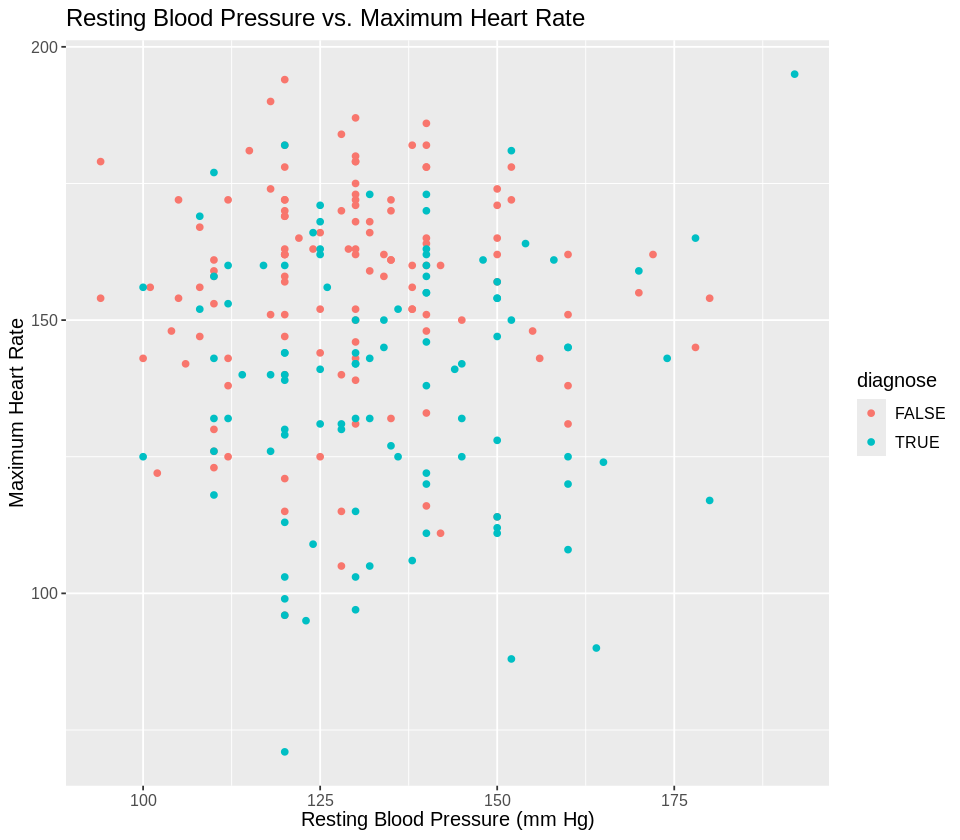

In [7]:
set.seed(999)
#We have plotted a visualization of the training data to observe the relationship.
options(repr.plot.width = 8, repr.plot.height = 7)

bp_thalach_plot <-ggplot(cleveland_training, aes(x=trestbps, y=thalach, color=diagnose)) +
                  geom_point() +
                  xlab("Resting Blood Pressure (mm Hg)") +
                  ylab("Maximum Heart Rate") +
                  ggtitle("Resting Blood Pressure vs. Maximum Heart Rate") +
                  theme(text = element_text(size = 12)) 
      

bp_thalach_plot


Figure 4

The scatterplot visually displays the relationship between maximum heart rate, resting blood pressure, and the presence of heart disease. By plotting the data points for patients with heart disease, it becomes evident that there is a trend of lower maximum heart rate and higher resting blood pressure among these individuals.

From this visualization, it is observed that a lower maximum heart rate leads to more true disgnoses, and a higher maximum heart rate leads to more false diagnoses. There is no clear correlation between resting blood pressure and diagnoses.

## Finding the best K value

### Creating the Model
##### We followed 6 Steps to create the model:
##### 1.Create a recipe that uses data=cleveland_training to predict diagnose, using treatbps and thalach as predictors
##### 2.Create a nearest_neighbors model specification, with neighbors = tune().
##### 3.Perform 5-fold cross-validation, stratifying by diagnose
##### 4.Fit the k-nearest neighbors model and include fold validation
##### 5.Repeat for each validation set for values of 1 ≤ k ≤ 100 by 5
##### 6.Extract accuracy metrics

In [8]:
# We are finding the best K value through creating a tuned model, recipe, etc and comparing the accuracy of all potentiaL K models.
set.seed(999)

#Create a recipe and scaling of data for k nearest neighbours
cleve_recipe <- recipe(diagnose ~ trestbps + thalach, data=cleveland_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors()) 

#K-nearest neighbour model specification
cleve_tune <- nearest_neighbor(weight_func="rectangular", neighbors= tune()) |>
            set_engine("kknn") |>
            set_mode("classification") 

#Perform 5 fold-cross validation
cleve_vfold <- vfold_cv(cleveland_training, v=5, strata = diagnose)

grid_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

#Fit the k-nn model and include fold validation
cleve_fit <- workflow() |>
            add_recipe(cleve_recipe) |>
            add_model(cleve_tune) |>
            tune_grid(resamples=cleve_vfold, grid=grid_vals) |>
            collect_metrics()

#Extract accuracy
accuracy <- cleve_fit |>
            filter(.metric=="accuracy") |>
            arrange(desc(mean)) |>
            select(neighbors, mean)
    

accuracy

neighbors mean     
1  86        0.6731225
2  76        0.6646245
3  21        0.6630435
⋮  ⋮         ⋮        
18 11        0.6326087
19  6        0.6021739
20  1        0.4996047

Figure 5

According to the table, we choose 86 as the best k value since it gives us the highest accuracy rate (67.31%). However, this accuracy is still quite low, likely due to our selection of inappropriate predictors. To determine whether 86 is a safe value to use, we can visualize it by plotting a line graph of accuracy versus k values.

### Visualizing accuracy

By plotting the line graph of accuracy versus k values, we can see how big of a difference in accuracy a difference of k ± 1 would cause.

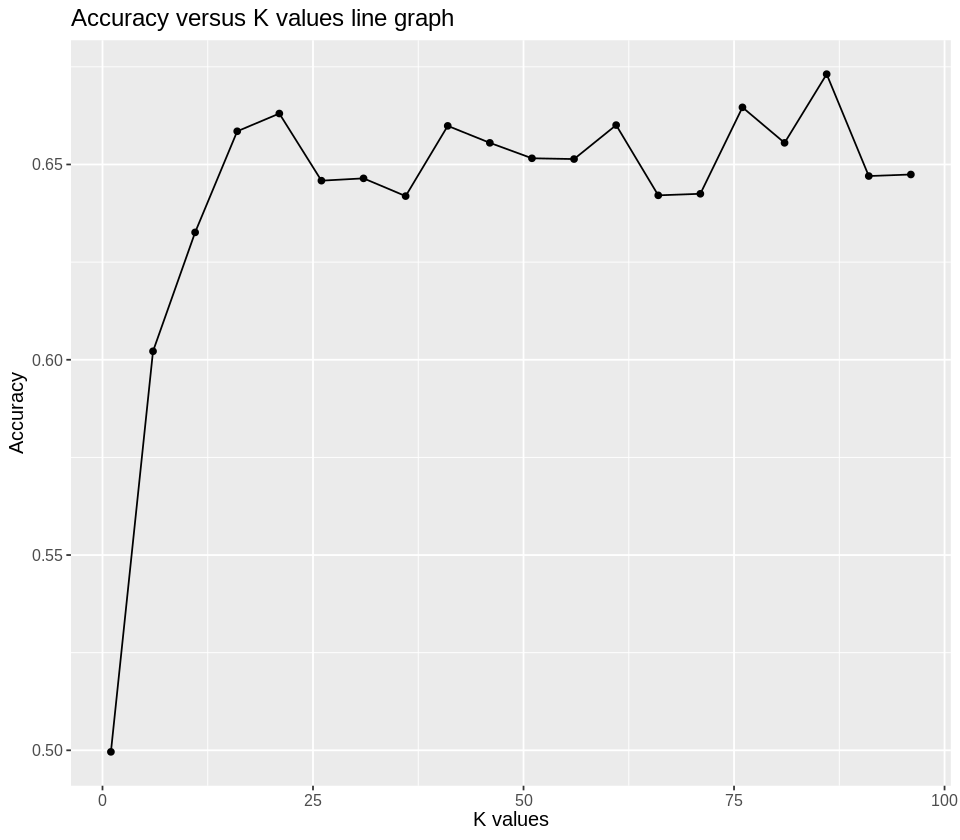

In [9]:
set.seed(999)

#We have created a plot determining best k value by plotting Accuracy vs K.
accuracy_vs_k <-ggplot(accuracy, aes(x=neighbors, y=mean)) +
                geom_point() + geom_line() +
                labs(x="K values", y="Accuracy") +
                ggtitle("Accuracy versus K values line graph") +
                theme(text = element_text(size = 12)) 

accuracy_vs_k

Figure 6

According to the graph, if we look at k=86, changing the value to a nearby one doesn’t decrease accuracy too much, so that our choice is reliable in the presence of uncertainty.

### Building the final model

Now we have our k=86. Then, we should create our final spec and then fit it to cleveland_training.

In [10]:
set.seed(999)

cleve_spec <- nearest_neighbor(weight_func="rectangular", neighbors = 86) |>
    set_engine("kknn") |>
    set_mode("classification")

final_fit <- workflow() |>
    add_recipe(cleve_recipe) |>
    add_model(cleve_spec) |>
    fit(data = cleveland_training)

final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(86,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3539823
Best kernel: rectangular
Best k: 86

### Checking for underfitting and overfitting

We want to check whether our model is experiencing either underfitting or overfitting. For K-NN model, both underfitting and overfitting can lead to low accuracy when predicting with new data.

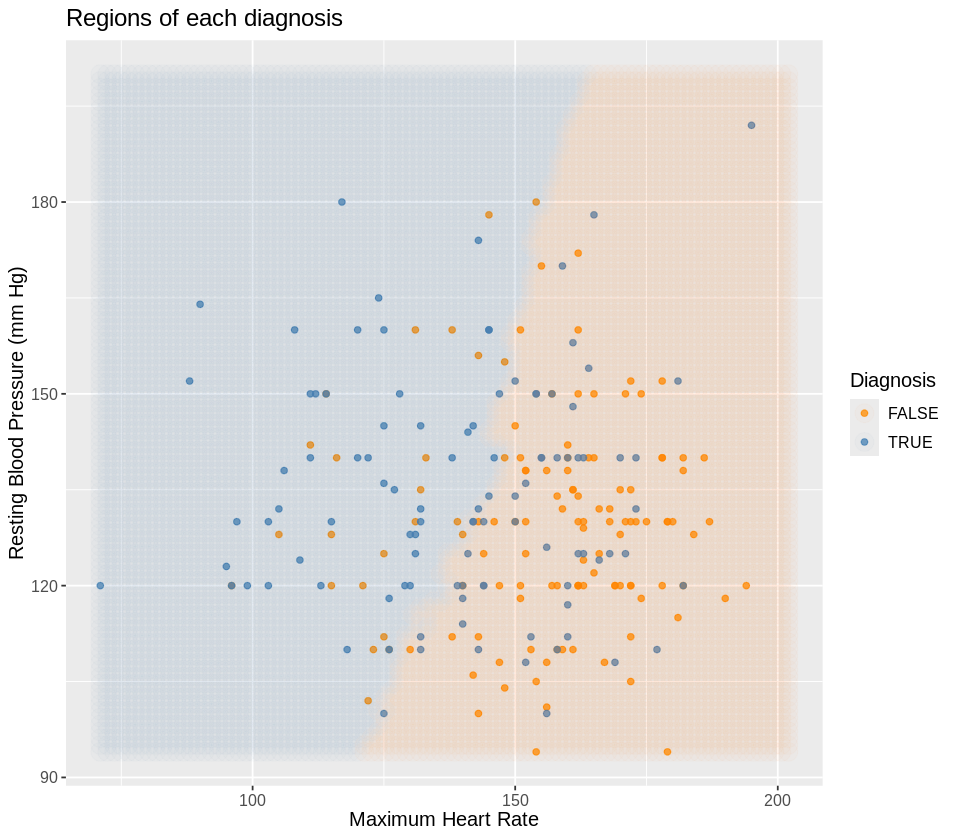

In [13]:
set.seed(999)

# Generate grid for prediction
thalach_grid <- seq(min(cleveland_data_cleaned$thalach), 
                    max(cleveland_data_cleaned$thalach), 
                    length.out = 100)

trestbps_grid <- seq(min(cleveland_data_cleaned$trestbps), 
                     max(cleveland_data_cleaned$trestbps), 
                     length.out = 100)

asgrid <- as_tibble(expand.grid(thalach = thalach_grid, 
                                trestbps = trestbps_grid))

# Make predictions on the grid
knnPredictionGrid <- predict(fit, asgrid)

# Combine predictions with grid data
prediction_table <- bind_cols(knnPredictionGrid, asgrid) |>
                    rename(diagnose = .pred_class)

# Create plot to visualize results
plot_results <- ggplot() + 
                geom_point(data = cleveland_training, 
                           aes(x = thalach, y = trestbps, color = diagnose), 
                           alpha = 0.75) +
                geom_point(data = prediction_table, 
                           aes(x = thalach, y = trestbps, color = diagnose), 
                           alpha = 0.02, size = 5) +
                labs(x = "Maximum Heart Rate", 
                     y = "Resting Blood Pressure (mm Hg)", 
                     color = "Diagnosis", 
                     title = "Regions of each diagnosis") +
                scale_color_manual(values = c("darkorange", "steelblue")) +
                theme(text = element_text(size = 12))

plot_results

Figure 7

Based on the graph, our model is neither underfitting nor overfitting. Therefore, it can be considered reliable for making predictions on new data.

### Evaluating on the testing set

Now we want to evaluate the quality of its predictions on the held out test data.
To make prediction, we will use the final_fit earlier with the cleveland_testing. We can look at the accuracy using 'metrics'. We can then pass those predictions to the conf_mat functions to print a confusion matrix.

In [12]:
set.seed(999)

#predict
test_predictions <- predict(final_fit, cleveland_testing) |>
  bind_cols(cleveland_testing)

#look at the accuracy of predictions
test_predictions |>
  metrics(truth = diagnose, estimate = .pred_class) |>
  filter(.metric == "accuracy")


#print the confusion matrix
confusion <- test_predictions |>
             conf_mat(truth = diagnose, estimate = .pred_class)
confusion

.metric  .estimator .estimate
1 accuracy binary     0.7402597

          Truth
Prediction FALSE TRUE
     FALSE    37   16
     TRUE      4   20

Figure 8

The model is 74.03% accurate, and labeled 57/77 observations correctly. It also seems to more likely to underdiagnose(16 cases) than overdiagnose(4 cases). In a medical context, one limitation of the model is its potential to misdiagnose patients with heart disease as healthy, which could adversely affect their treatment outcomes. 

This model, considering its involvement in medical data, has a mediocre accuracy. Typically, the accuracy you would want would be higher, as you want to avoid as many misdiagnoses as possible (to avoid people with false diagnoses receiving unecessary treatment). It should be noted that the amount of people without heartdisease being misdiagnosed was more common than those with heart disease being misdiagnosed. Overall, we would not recommend this model in a medical setting unless the accuracy was improved.

## Discussion

We found that there was no particular correlation between the two factors resting blood pressure and maximum heart rate. However there were more false diagnoses on the upper half of the y-axis(maximum heart rate) indicating that those with lower maximum heart rates are more likely to receive a true diagnosis for heart disease.

We expected the two factors to have an inverse correlation as high resting blood pressure increases risk for a true diagnosis and high maximum heart rate decreases risk of a true diagnosis. Therefore using this rationale we expected the false diagnosis to cluster at the top left of the graph and true diagnosis to cluster at the bottom right of the graph.

The absence of a clear correlation between resting blood pressure and maximum heart rate concerning the accuracy of heart disease diagnoses has significant implications. Primarily, it challenges the conventional wisdom or expectations that might exist among clinicians regarding the predictive value of these two factors in isolation. The finding that lower maximum heart rates are associated with a higher likelihood of receiving a true diagnosis for heart disease suggests that current diagnostic processes might be overly reliant on specific indicators that do not fully encapsulate an individual's risk profile. This could potentially lead to overdiagnosis or underdiagnosis in patients whose resting blood pressure or heart rate deviates from expected patterns but who may still be at significant risk of heart disease.

This study opens several avenues for further research. First and foremost, it raises the question of what other factors should be considered in conjunction with resting blood pressure and maximum heart rate to improve the accuracy of heart disease diagnoses. Future studies could explore the role of variables such as age, gender, cholesterol levels, family history, and lifestyle factors (e.g., smoking, diet, physical activity) in predicting heart disease more reliably. Some examples of future questions are:

1) What age is most susceptible to being diagnosed with heart disease?
2) How would the results found change if other variables were factored in?
3) How can this model be modified to increase its reliability in a medical setting?
4) How many humans in the entire continent of North America have been misdiagnosed with heart disease (false diagnoses)?


## References

“Monitoring Your Heart Rate: What’s Normal and When to Worry.” WebMD, WebMD, www.webmd.com/heart-disease/heart-failure/watching-rate-monitor. 

Oh, Gyu Chul, and Hyun-Jai Cho. “Blood pressure and heart failure.” Clinical hypertension vol. 26 1. 2 Jan. 2020, doi:10.1186/s40885-019-0132-x

#### Source:
Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

